In [1]:
import bs4
import urllib.request as req
import pandas as pd
import requests
import matplotlib.pyplot as plot
import numpy as np

In [2]:
 req.urlretrieve("https://prsindia.org/covid-19/cases/download","Covid.csv")

('Covid.csv', <http.client.HTTPMessage at 0x7f1af9a092b0>)

In [3]:
c = pd.read_csv("Covid.csv")
df = pd.DataFrame(c)

In [4]:
df.rename(columns={"Confirmed Cases":"Confirm","Active Cases":"Active","Cured/Discharged":"Recovered"},inplace=True)

In [5]:
df['Date']=df['Date'].str.replace('/2121','/2021')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [ ]:
ind_df = df[df['Region']=='India']

In [ ]:
ind_df.loc[:,'Confirm'] = ind_df.Confirm.astype(float)
ind_df.loc[:,'Recovered'] = ind_df.Recovered.astype(float)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()

In [ ]:
confirm = ind_df.groupby('Date').sum()['Confirm'].reset_index()
recover = ind_df.groupby('Date').sum()['Recovered'].reset_index()
death = ind_df.groupby('Date').sum()['Death'].reset_index()
recover.head()

,Date,Recovered
0,2020-03-12,3.0
1,2020-03-13,3.0
2,2020-03-14,10.0
3,2020-03-15,10.0
4,2020-03-16,13.0


In [ ]:
confirm.columns=['ds','y']
confirm=pd.DataFrame(confirm)
confirm['ds']=pd.to_datetime(confirm['ds'])
confirm.head()

,ds,y
0,2020-03-12,74.0
1,2020-03-13,75.0
2,2020-03-14,84.0
3,2020-03-15,107.0
4,2020-03-16,114.0


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


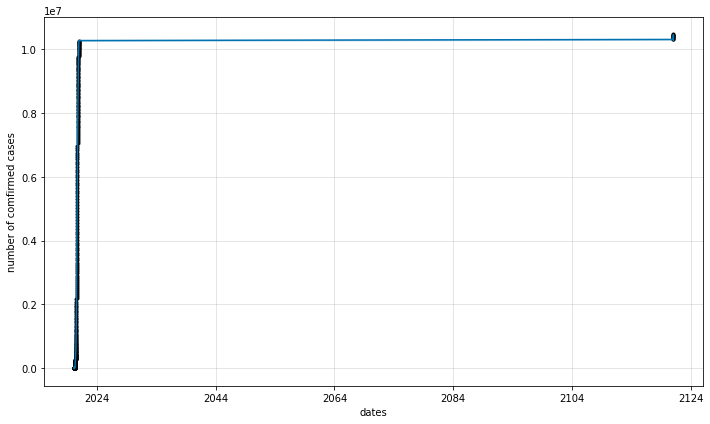

In [ ]:
m=Prophet(interval_width=0.95)
m.fit(confirm)
future=m.make_future_dataframe(periods=7)

forecast=m.predict(future)
forecast.tail()
forecast[['ds','yhat','yhat_lower','yhat_upper']]
confirmed_forecast_plot=m.plot(forecast,xlabel='dates',ylabel="number of comfirmed cases")

In [ ]:
recover.columns=['ds','y']
recover=pd.DataFrame(recover)
recover['ds']=pd.to_datetime(recover['ds'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


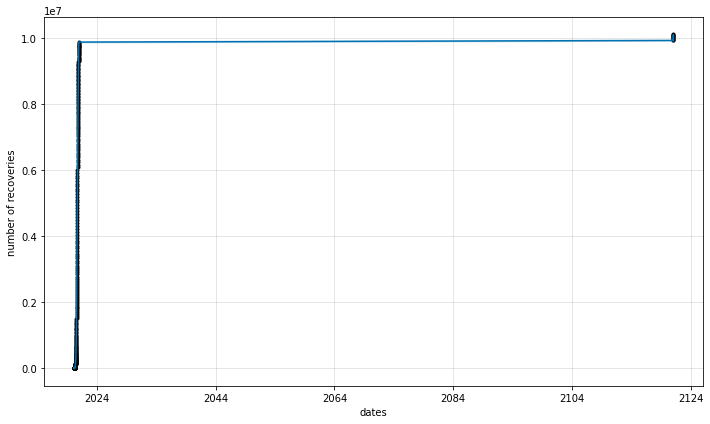

In [ ]:
m=Prophet(interval_width=0.95)
m.fit(recover)
future=m.make_future_dataframe(periods=7)

forecast=m.predict(future)
forecast.tail()
forecast[['ds','yhat','yhat_lower','yhat_upper']]
recover_forecast_plot=m.plot(forecast,xlabel='dates',ylabel="number of recoveries")

In [ ]:
death.columns=['ds','y']
death=pd.DataFrame(death)
death['ds']=pd.to_datetime(death['ds'])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


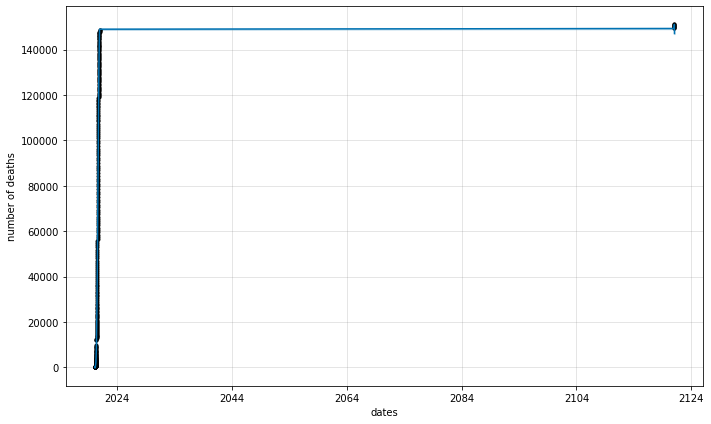

In [ ]:
m=Prophet(interval_width=0.95)
m.fit(death)
future=m.make_future_dataframe(periods=7,include_history=True)

forecast=m.predict(future)
forecast.tail()
forecast[['ds','yhat','yhat_lower','yhat_upper']]
death_forecast_plot=m.plot(forecast,xlabel='dates',ylabel="number of deaths")